100%|██████████| 2.13G/2.13G [00:13<00:00, 169MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/gti-upm/leapgestrecog/versions/1
Directory exists: True
Found 32000 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.
9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/5
1000/1000 [==============================] - 244s 241ms/step - loss: 0.7921 - accuracy: 0.4959 - val_loss: 0.6981 - val_accuracy: 0.4986
Epoch 2/5
1000/1000 [==============================] - 235s 235ms/step - loss: 0.7019 - accuracy: 0.4974 - val_loss: 0.6986 - val_accuracy: 0.4959
Epoch 3/5
1000/1000 [==============================] - 234s 234ms/step - loss: 0.6976 - accuracy: 0.4977 - val_loss: 0.6952 - val_accuracy: 0.4991
Epoch 4/5
1000/1000 [==============================] - 234s 234ms/step - loss: 0.6958 - accuracy: 0.4963 - val_loss: 0.6936 - val_accuracy: 0.4961
Epoch 5/5
1000/1000 [==============================] - 238s 238ms/step - loss: 0.6946 - accuracy: 0.4911 - val_loss: 0.6936 - val_accuracy: 0.4976
Epoch 

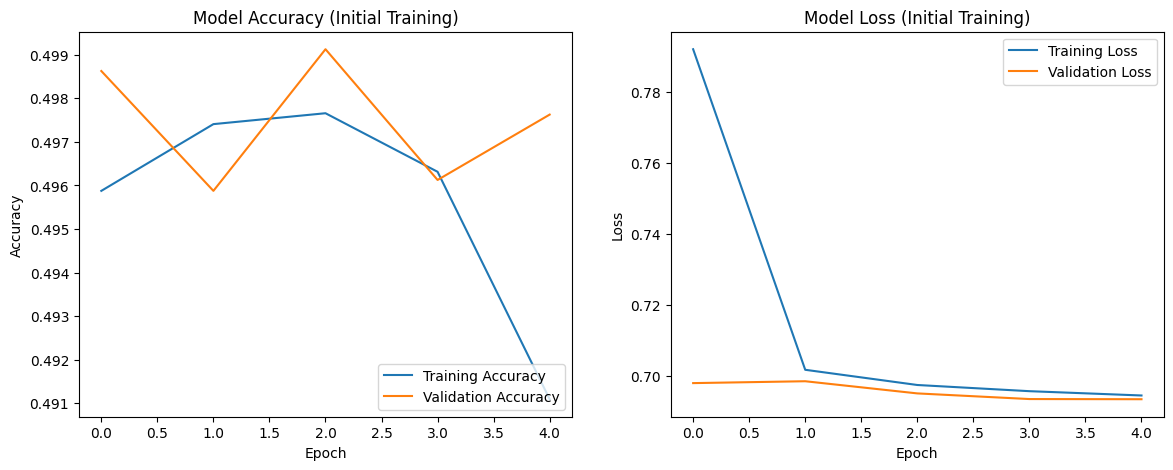

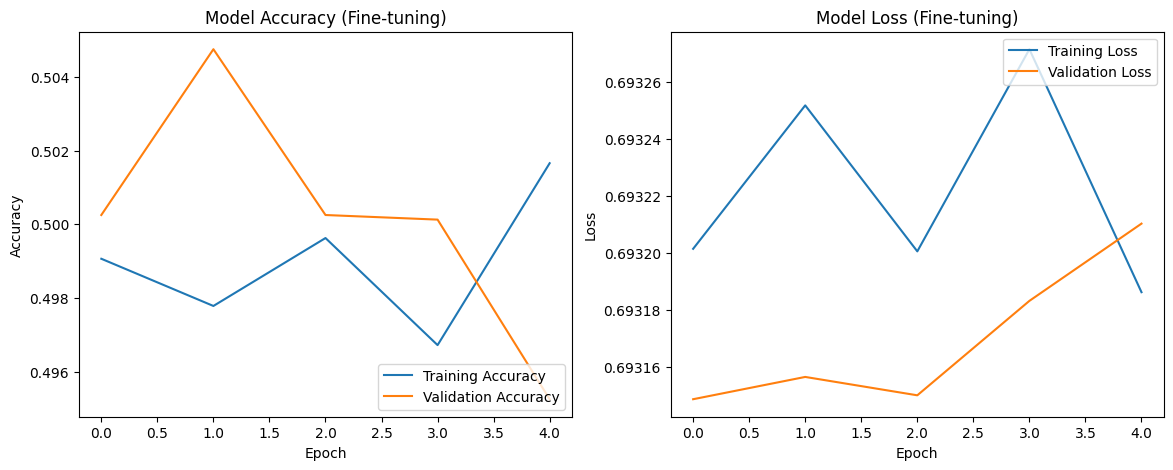

In [4]:
import kagglehub

path = kagglehub.dataset_download("gti-upm/leapgestrecog")

print("Path to dataset files:", path)

import os

dataset_path = '/root/.cache/kagglehub/datasets/gti-upm/leapgestrecog/versions/1'
print("Directory exists:", os.path.exists(dataset_path))
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2


dataset_path =  '/root/.cache/kagglehub/datasets/gti-upm/leapgestrecog/versions/1'

image_size = (128, 128)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5
)

base_model.trainable = True
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

history_fine = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5
)

model.save('/content/hand_symbol_model.h5')

import matplotlib.pyplot as plt

def plot_history(history, title_suffix=""):

    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Model Accuracy {title_suffix}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model Loss {title_suffix}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    plt.show()


plot_history(history, title_suffix="(Initial Training)")


plot_history(history_fine, title_suffix="(Fine-tuning)")






def plot_history(history, title_suffix=""):

    plt.figure(figsize=(8, 4))


    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Model Accuracy {title_suffix}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model Loss {title_suffix}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()
